# Анализ бизнес показателей развлекательного приложения Procrastinate Pro+
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Вам предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

### Загрузка данных и подготовка их к анализу

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#загрузим данные
try:
    visits = pd.read_csv('datasets/visits_info_short.csv')
    orders = pd.read_csv('datasets/orders_info_short.csv')
    costs = pd.read_csv('datasets/costs_info_short.csv')
except FileNotFoundError:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')
visits.name = 'Посещения сайта'
orders.name = 'Информация о покупках'
costs.name = 'Расходы на рекламу'

In [3]:
#функция выводит основную информацию о датафрейме, а также первые 5 его строк
def display_df_info(df):
    print('===================')
    print('\033[1m', df.name, '\033[0m')
    print('===================')
    display(df.info())
    print('Количество полных дубликатов: ' + str(df.duplicated().sum()))
    display(df.describe())
    display(df.head(5))
    
for df in [visits, orders, costs]:
    display_df_info(df)

 Посещения сайта 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

Количество полных дубликатов: 0


,User Id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


 Информация о покупках 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

Количество полных дубликатов: 0


,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


 Расходы на рекламу 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Количество полных дубликатов: 0


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


В данных нет пропущенных значений и полных дубликатов. Столбцы с датами и временем необходимо привести к формату `datetime`. Названия столбцов нужно привести к стандартным, чтобы избежать ошибок.

In [4]:
#приведем названия колонок к стандартным
#уберем пробелы
visits = visits.rename(columns={'User Id': 'user_id',
                                'Session Start': 'session_start',
                                'Session End': 'session_end'})
orders = orders.rename(columns={'User Id': 'user_id',
                                'Event Dt': 'event_dt'})

#приведем к нижнему регистру
for df in [visits, orders, costs]:
    df.columns = df.columns.str.lower()
    
#приведем даты к правильному типу данных
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Таблица visits (Посещения сайта):

- `User Id` — уникальный идентификатор пользователя
- `Device` — категория устройства пользователя
- `Session start` — дата и время начала сессии
- `Session End` — дата и время окончания сессии
- `Channel` — идентификатор рекламного источника, из которого пришел пользователь
- `Region` - страна пользователя

In [5]:
visits['user_id'].nunique()

150008

Всего записей в таблице посещений 309901, уникальных пользователей примерно в два раза меньше - 150008

In [6]:
for n in ['region', 'device', 'channel']:
    print(visits[n].value_counts(),'\n')

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64 

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64 

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64 



В логах имеются данные о пользователях из 4х стран - США, Англии, Франции, Германии. Больше всего пользователей из США.

Пользователи используют 4 вида устройств - iPhone, Android, PC, Mac. Чаще встречаются владельцы iPhone.

В данных есть информация о 11 видах каналов привлечения пользователей. Не учитывая пользователей, которые пришли самостоятельно (organic), самыми часто встречающимися каналами являются TipTop и FaceBoom.

Таблица orders (Информация о покупках):

- `User Id` — уникальный id пользователя, который сделал заказ
- `Event Dt` — дата и время покупки
- `Revenue` — выручка

В таблице orders имеются данные о 40212 покупках. 

В среднем каждый заказ совершается на сумму 5.37. Медиана и среднее довольно близко расположены, можно предположить, что сильных выбросов в данных нет. Также видим, что 1, 2, 3 и 4 квантили - все они равны 4.99. Можно предположить, что это стоимость подписки.

Таблица costs (Расходы на рекламу):

- `Channel` — идентификатор рекламного источника
- `Dt` — дата
- `Costs` — затраты на этот рекламный источник в этот день

In [7]:
costs['dt'].nunique()

180

In [8]:
costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Всего 1800 строк с данными о затратах на маркетинг. Данные содержатся за 180 дней, что соответствует указанному в ТЗ промежутку.

Средние и медианные затраты на маркетинг имеют довольно большую разницу (58.6 и 12.2 соответственно) - либо на какие-то каналы уходит больше трат, либо могли проводится крупные короткие рекламные кампании.
Максимальная трата на маркетинг - 630, минимальная - 0.8.

Самые большие затраты пришлись на каналы TipTop и FaceBoom.

#### Вывод

На данном этапе мы загрузили данные о визитах, заказах и расходах в переменные и подготовили их к анализу. Проверили, что в данных нет дубликатов и пустых значений. Типы данных в столбцах соответвуют значениям.

Всего уникальных пользователей - 150008. В логах имеются данные о пользователях из 4х стран - США, Англии, Франции, Германии. Больше всего пользователей из США. Пользователи используют 4 вида устройств - iPhone, Android, PC, Mac. Чаще встречаются владельцы iPhone. В данных есть информация о 11 видах каналов привлечения пользователей. 

В таблице orders имеются данные о 40212 покупках. В среднем каждый заказ совершается на сумму 5.37.

Всего 1800 строк с данными о затратах на маркетинг. Данные содержатся за 180 дней, что соответствует указанному в ТЗ промежутку. Самые большие затраты пришлись на каналы TipTop и FaceBoom.

### Функции для расчета и анализа LTV, ROI, удержания и конверсии

Соберём функции для создания профилей, расчёта удержания, конверсии, LTV и ROI.

In [9]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [10]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [11]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [12]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [13]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

А также функции для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

In [14]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [15]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [16]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [17]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

#### Построим профили пользователей и определим минимальную и максимальную дату привлечения пользователей.

In [18]:
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5)) 

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


In [19]:
display("Минимальная дата привлечения:{}".format(profiles['first_ts'].min()),
"Момент анализа:{}".format(datetime(2019, 11, 1)),
"Максимальная дата привлечения:{}".format(profiles['first_ts'].max()))

'Минимальная дата привлечения:2019-05-01 00:00:41'

'Момент анализа:2019-11-01 00:00:00'

'Максимальная дата привлечения:2019-10-27 23:59:04'

Временные рамки соответствуют заданным в ТЗ.

#### Посмотрим из каких стран приходят посетители и какие страны дают больше всего платящих пользователей.

In [20]:
#найдем количество пользователейиз каждой страны, количество и процент пользователей перешедших в категорию платящих
profiles_regions = profiles.groupby('device').agg({'user_id':'nunique','payer':['sum','mean']}).sort_values(by=('payer','mean'),ascending=False)
    
#найдем процентное соотношение пользователей
profiles_regions['user_id_%'] = profiles_regions['user_id'] / profiles_regions['user_id'].sum()
profiles_regions['user_id_%'] = profiles_regions['user_id_%'].map('{:,.2%}'.format)
profiles_regions.style.format({('payer','mean'):'{:.2%}'})

Большая часть пользователей из США (67%) и среди них больше всего платящих пользователей (7%). Далее идут пользователи Англии и Франции (примерно по 12%) и пользователи из Германии (10%) - среди них платящих пользователей около 4%.

#### Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?

In [21]:
#найдем количество пользователей, использующих разные устройства, количество и процент пользователей перешедших в категорию платящих
profiles_device = profiles.groupby('device').agg({'user_id':'nunique','payer':['sum','mean']}).sort_values(by=('payer','mean'),ascending=False)
    
#найдем процентное соотношение пользователей
profiles_device['user_id_%'] = profiles_device['user_id'] / profiles_device['user_id'].sum()
profiles_device['user_id_%'] = profiles_device['user_id_%'].map('{:,.2%}'.format)
profiles_device.style.format({('payer','mean'):'{:.2%}'})

Чаще всего пользователи пользуются приложением через iPhone (36%) и Android (23%), то есть через мобильные устройства. Реже используют PC и Mac (их доли примерно по 20%).

Больше всего платящих пользователей среди тех, кто использует Mac (6,4%). Довольно близко к ним пользователи iPhone (6,21%).
Среди пользователей Android платящих 5,9%. Меньше всего платящих среди пользователей PC (5,1%)

#### По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [22]:
#найдем количество пользователей, пришедших с разных рекламных каналов, количество и процент пользователей перешедших в категорию платящих
profiles_channel = profiles.groupby('channel').agg({'user_id':'nunique','payer':['sum','mean']}).sort_values(by=('payer','mean'),ascending=False)
    
#найдем процентное соотношение пользователей
profiles_channel['user_id_%'] = profiles_channel['user_id'] / profiles_channel['user_id'].sum()
profiles_channel['user_id_%'] = profiles_channel['user_id_%'].map('{:,.2%}'.format)
profiles_channel.style.format({('payer','mean'):'{:.2%}'})

Больше всего пользователей пришло в приложение самостоятельно (38%), среди них меньше всего платящих пользователей (2%).

Среди платных каналов FaceBoom и TipTop привелекли больше всего пользователей (19% и 13% соответственно).
Из каналов OppleCreativeMedia, LeapBob, WahooNetBanner пришло примерно равное количество пользователей (~5,7%). Из каналов RocketSuperAds, RocketSuperAds, MediaTornado, YRabbit, AdNonSense пришло примерно по 2,5-3% пользователей. Меньше всего пользователей пришло из канала lambdaMediaAds.

Больше всего платящих пользователей пришло из каналов FaceBoom, AdNonSense, lambdaMediaAds и TipTop (10-12%). Менее всего конвертируются пользователи из OppleCreativeMedia (2.71%) и LeapBob (3.06%).

#### Вывод

На этом этапе мы построили профили пользователей и проверили временные рамки. Они соответствуют заданным в ТЗ. 

Большая часть пользователей из США (67%) и среди них больше всего платящих пользователей (7%). Далее идут пользователи Англии и Франции (примерно по 12%) и пользователи из Германии (10%) - среди них платящих пользователей около 4%.

Чаще всего пользователи пользуются приложением через iPhone (36%) и Android (23%), то есть через мобильные устройства. Реже используют PC и Mac (их доли примерно по 20%).

Больше всего платящих пользователей среди тех, кто использует Mac (6,4%). Довольно близко к ним пользователи iPhone (6,21%). Среди пользователей Android платящих 5,9%. Меньше всего платящих среди пользователей PC (5,1%).

Больше всего пользователей пришло в приложение самостоятельно (38%), среди них меньше всего платящих пользователей (2%).

Среди платных каналов FaceBoom и TipTop привелекли больше всего пользователей (19% и 13% соответственно). Из каналов OppleCreativeMedia, LeapBob, WahooNetBanner пришло примерно равное количество пользователей (~5,7%). Из каналов RocketSuperAds, RocketSuperAds, MediaTornado, YRabbit, AdNonSense пришло примерно по 2,5-3% пользователей. Меньше всего пользователей пришло из канала lambdaMediaAds.

Больше всего платящих пользователей пришло из каналов FaceBoom, AdNonSense, lambdaMediaAds и TipTop (10-12%). Менее всего конвертируются пользователи из OppleCreativeMedia (2.71%) и LeapBob (3.06%).

### Маркетинг

#### Выясним, сколько всего было затрат на маркетинг и как они распределены по времени.

In [23]:
round(costs['costs'].sum(), 2)

105497.3

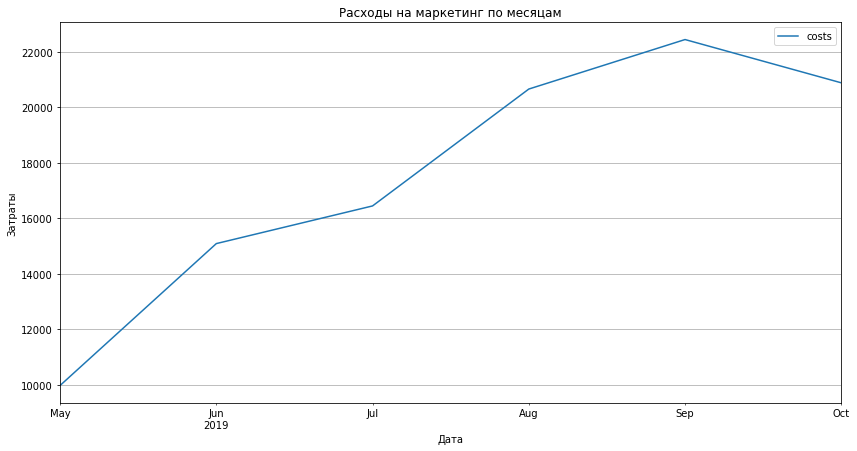

In [24]:
# выделим месяца из дат
costs['dt_month'] = costs['dt'].astype('datetime64[M]')
# строим график истории изменений расходов на маркетинг

costs.pivot_table(index=costs['dt_month'], values='costs', aggfunc='sum').plot(grid=True, figsize=(14, 7))
plt.title('Расходы на маркетинг по месяцам')
plt.ylabel('Затраты')
plt.xlabel('Дата')
plt.show() 

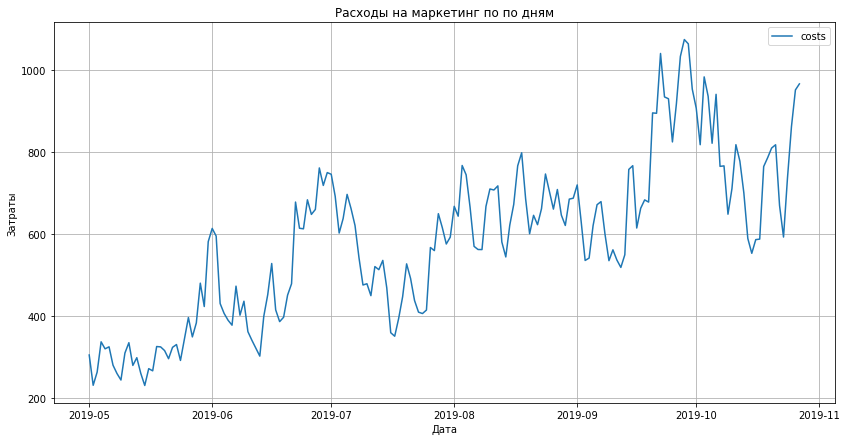

In [25]:
costs.pivot_table(index='dt', values='costs', aggfunc='sum').plot(grid=True, figsize=(14, 7))
plt.title('Расходы на маркетинг по по дням')
plt.ylabel('Затраты')
plt.xlabel('Дата')
plt.show() 

Общие затраты на маркетинг составили 105497.3 у.е.

По графику истории изменений расходов на маркетинг по месяцам видно, что расходы постепенно увеличивались до сентября и в октябре был небольшой спад.
На графике расходов по дням видно, что рекламный бюджет увеличивался в начале/конце месяца, а в середине месяца обычно был спад.

#### Выясним, сколько всего было затрат на маркетинг на каждый источник и их распределение по времени.

In [26]:
#посчитаем затраты на каждый канал и процент от общего количества рекламных каналов
costs_channel = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)
costs_channel['costs_%'] = (costs_channel['costs'] / costs_channel['costs'].sum()).map('{:,.2%}'.format)
costs_channel

,costs,costs_%
channel,,
TipTop,54751.30,51.90%
FaceBoom,32445.60,30.75%
WahooNetBanner,5151.00,4.88%
AdNonSense,3911.25,3.71%
OppleCreativeMedia,2151.25,2.04%
RocketSuperAds,1833.00,1.74%
LeapBob,1797.60,1.70%
lambdaMediaAds,1557.60,1.48%
MediaTornado,954.48,0.90%


Больше всего трат приходитя на каналы TipTop (51,9%) и FaceBoom(30,8%). Далее можно отметить каналы WahooNetBanner (4,9%), AdNonSense (3,7%). На оставшиеся источники приходится 1-2% трат.

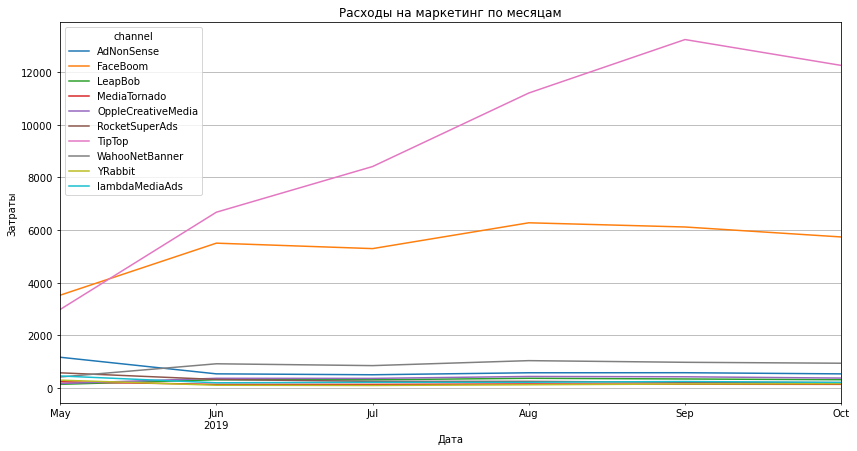

In [27]:
# строим график истории изменений расходов на маркетинг по каждому источнику

costs.pivot_table(index=costs['dt_month'], columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(14, 7))
plt.title('Расходы на маркетинг по месяцам')
plt.ylabel('Затраты')
plt.xlabel('Дата')
plt.show() 

Посмотрим, как распределялись траты на каналы привлечения по дням. За весь изучаемый период

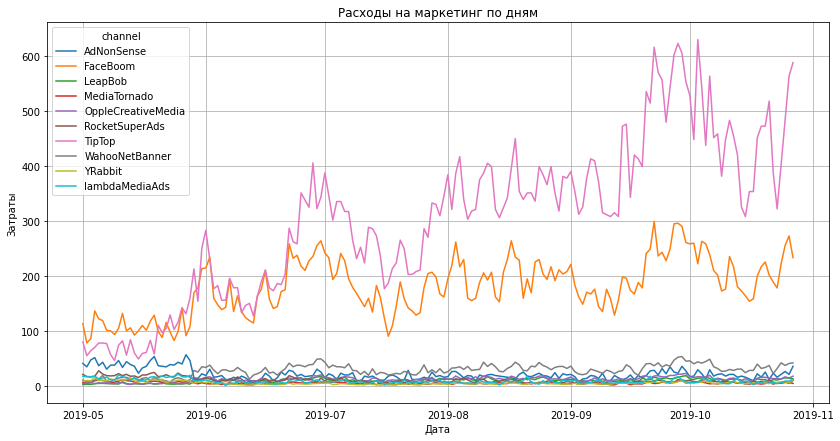

In [28]:
# строим график истории изменений расходов на маркетинг по каждому источнику

costs.pivot_table(index='dt', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(14, 7))
plt.title('Расходы на маркетинг по дням')
plt.ylabel('Затраты')
plt.xlabel('Дата')
plt.show() 

На этом графике также выделяются только два канала - это TipTop и FaceBoom. До середины июня затраты на них были примерно на одном уровне. После середины июня затраты на FaceBoom стали стабильно находится в пределах 100-300 у.е. в день. А затраты на TipTop стали расти и к октябрю стали достигать 650 у.е.

Динамику на других каналах понять сложно, так что посмотрим на них на отдельном срезе.

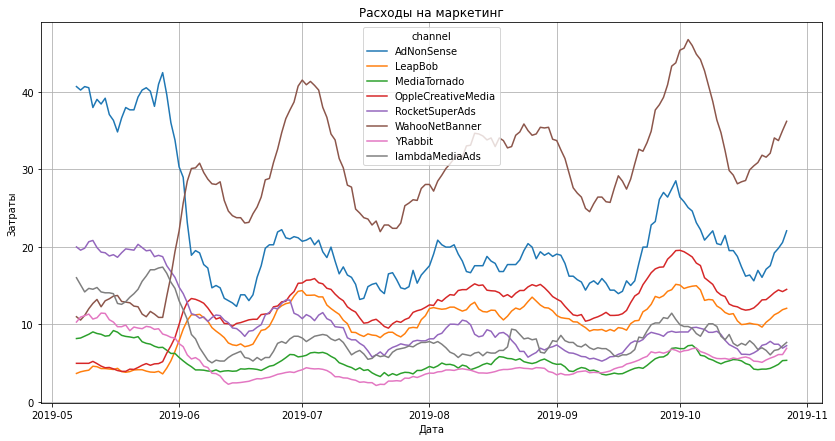

In [29]:
# строим график истории изменений расходов на маркетинг по каждому источнику без TipTop и FaceBoom, используя сглаживание
window = 7
report = costs[~costs['channel'].isin(['TipTop', 'FaceBoom'])].pivot_table(index='dt', columns='channel', values='costs', aggfunc='sum')
filter_data(report, window).plot(grid=True, figsize=(14, 7))
plt.title('Расходы на маркетинг')
plt.ylabel('Затраты')
plt.xlabel('Дата')
plt.show() 

Среди рассматриваемых рекламных источников с июня начали расти траты на WahooNetBanner (к октябрю их число было в районе 50 у.е.). Затраты на AdNonSense, наоборот, стали снижаться. По остальным источникам траты варьируются в пределах 3-20 у.е.

#### Средняя стоимость привлечения одного покупателя из каждого источника.

In [30]:
profiles.describe()

,user_id,acquisition_cost
count,1.500080e+05,150008.000000
mean,4.993238e+11,0.703278
std,2.889483e+11,0.954097
min,5.993260e+05,0.000000
25%,2.489249e+11,0.000000
50%,4.977046e+11,0.247500
75%,7.494919e+11,1.108943
max,9.999996e+11,3.715385


Средняя стомость привлечения пользователя - 0,7 у.е., а медианная - 0,25 у.е. Вероятно, медиану так сильно уменьшили органические пользователи с нулевой стоимостью привлечения, так как минимальное значение и значение 1-го квартиля нулевое. Максимальная стоимоть привлечения пользователя - 3.7 у.е.

In [31]:
#стоимость привлечения пользователей по рекламным каналам
profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending=False).style.format({'acquisition_cost': '{:.2f}'})

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


Самый дорогой канал привлечения - TipTop (в среднем 2.8 у.е. за пользователя). Далее идут FaceBoom и AdNonSense (1.1 и 1 у.е. соответственно).  Органический трафик бесплатен, в сотльных каналах стоимость пользователя составляет от 0.21 до 0.72 у.е.

#### Вывод

На данном этапе мы проанализировали затраты на маркетинг. Общие затраты составили 105497.3 у.е.

По графику истории изменений расходов на маркетинг видно, что расходы постепенно увеличивались весь рассматриваемый период.

Больше всего трат приходится на каналы TipTop (51,9%) и FaceBoom(30,8%). До середины июня затраты на них были примерно на одном уровне. После середины июня затраты на FaceBoom стали стабильно находится в пределах 100-300 у.е. в день. А затраты на TipTop стали расти и к октябрю стали достигать 650 у.е.

Средняя стомость привлечения пользователя - 0,7 у.е., а медианная - 0,25 у.е. Самый дорогой канал привлечения - TipTop (в среднем 2.8 у.е. за пользователя). Далее идут FaceBoom и AdNonSense (1.1 и 1 у.е. соответственно). Органический трафик бесплатен, в остальных каналах стоимость пользователя составляет от 0.21 до 0.72 у.е.

### Анализ общей окупаемости рекламы

Момент анализа - 01.11.2019, горизонт анализа - 14 дней.
Органический трафик из анализа исключим, так как мы за него ничего не платим.

In [32]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14 
profiles = profiles.query('channel != "organic"')

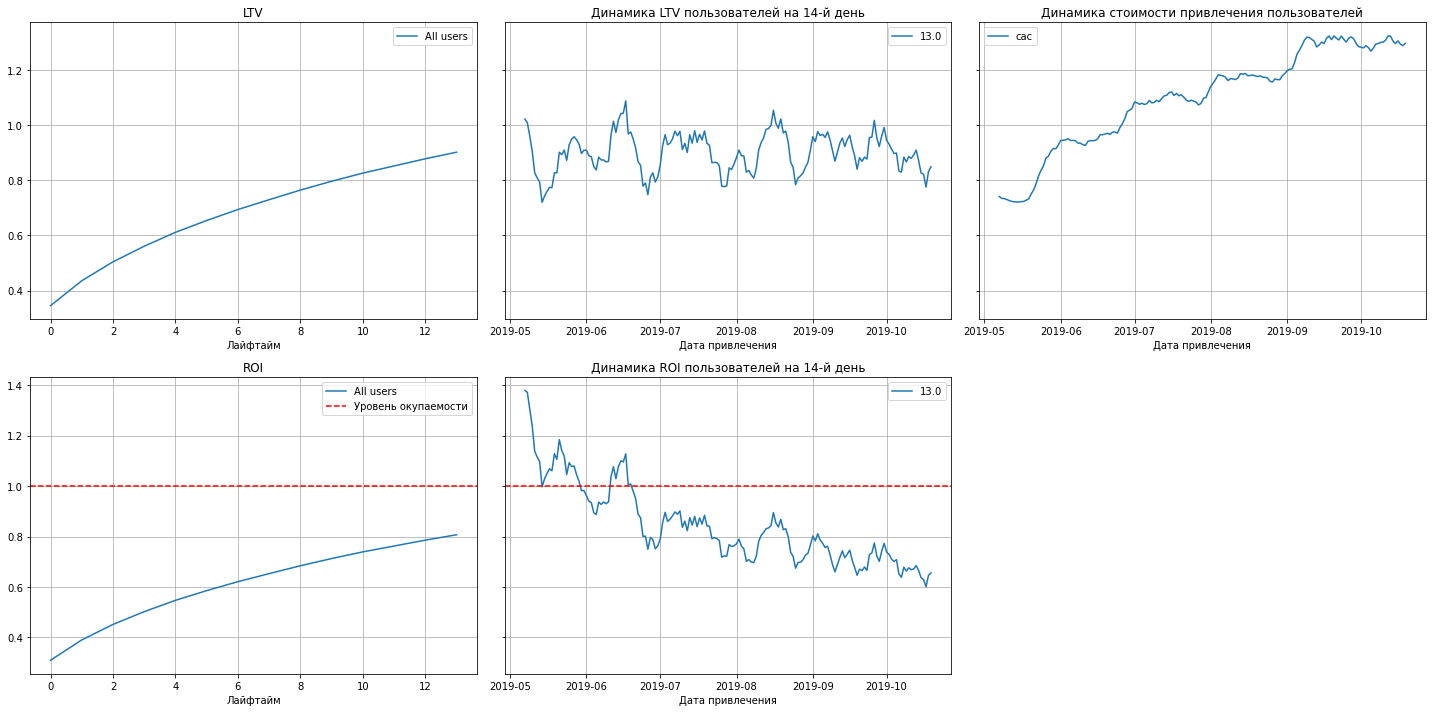

In [33]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- Реклама не окупается. ROI в конце недели — чуть выше 80%.
- CAC не стабилен. Рекламный бюджет всё время увеличивается.
- На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
- ROI пользователей на 14-й день стабильно падает. До июля он был выше уровня окупаемости, а после стал опускаться все ниже. К ноябрю упал до 60%.

### Анализ окупаемости рекламы с разбивкой по устройствам

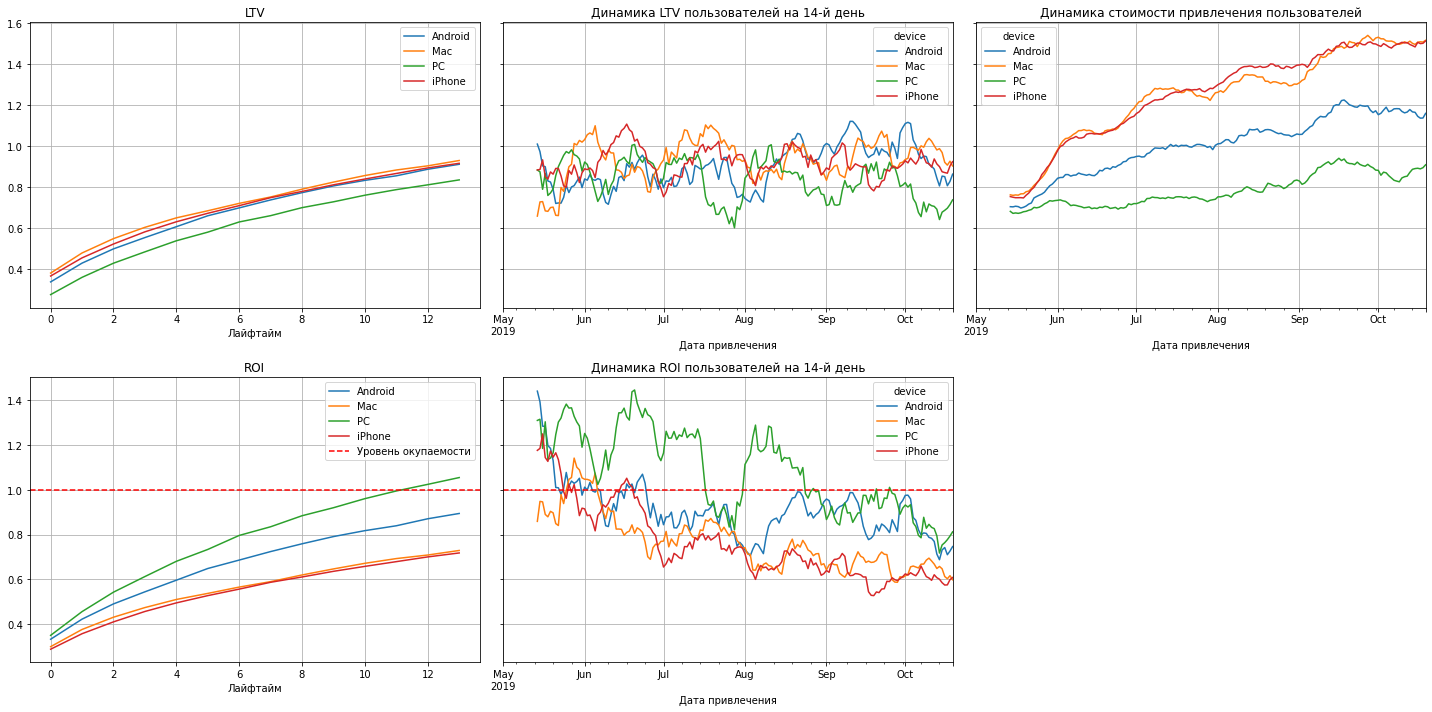

In [34]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- LTV стабильно растет
- Динамика LTV немного колеблется, но остается в стабильных пределах.
- Стоимость привлечения пользователей постепенно увеличивается, особенно у пользолвателей IPhone и Mac.
- Реклама окупается только для пользователей PC. Для пользолвателей IPhone и Mac ROI не превышает 80%.

Интересно взглянуть на динамику ROI. По этому графику видно, что до июня реклама окупалась для всех устройств. В июне ROI пошел на спад, особенно для владельцев IPhone и Mac. У владельцев Android ситуация была чуть лучше, но границу окупаемости они тоже больше не пересекали.
Начиная с сентября ROI всех пользователей опустился ниже уровня окупаемости.

Посмотрим на конверсию и её динамику по устройствам.

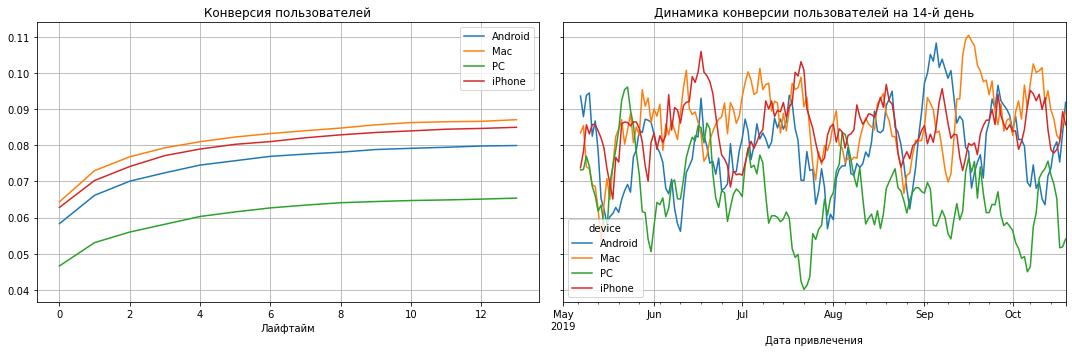

In [35]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам как раз пользователи IPhone и Mac стабильно и хорошо конвертируются. Значит нужно посмотреть на удержание.

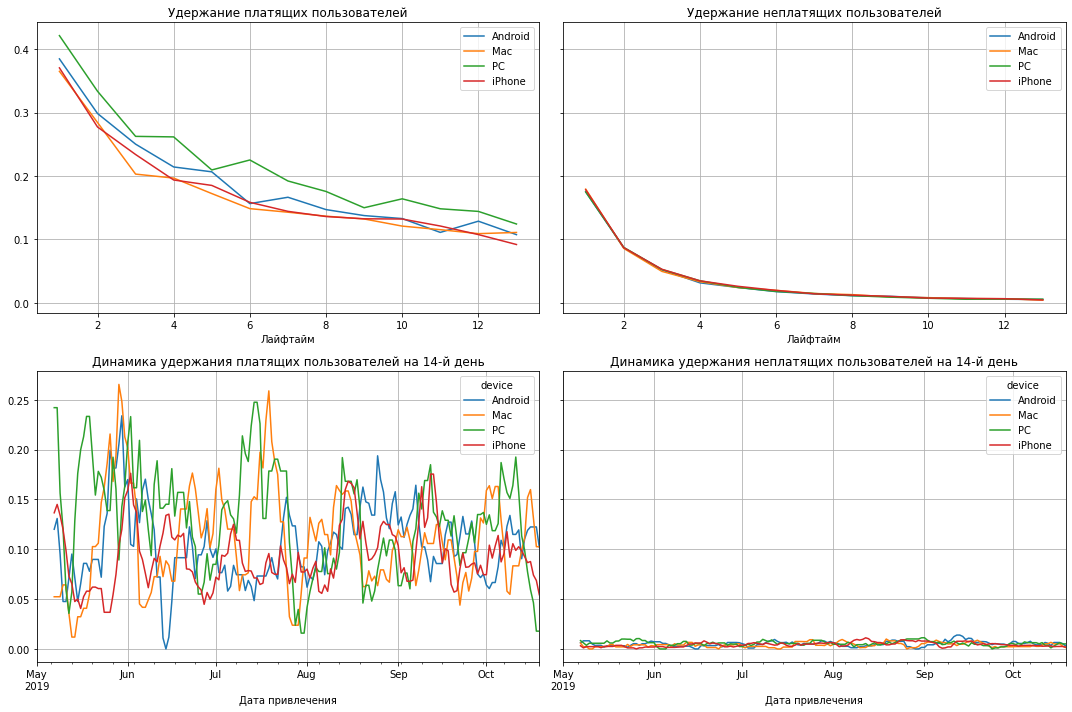

In [36]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

По графикам нельзя сказать, что какие-то пользователи удерживаются сильно хуже остальных. Конечно, неплатящие пользователи удерживаются стабильно плохо. А среди платящих чуть лучше удерживаются владельцы PC.

### Анализ окупаемости рекламы с разбивкой по странам

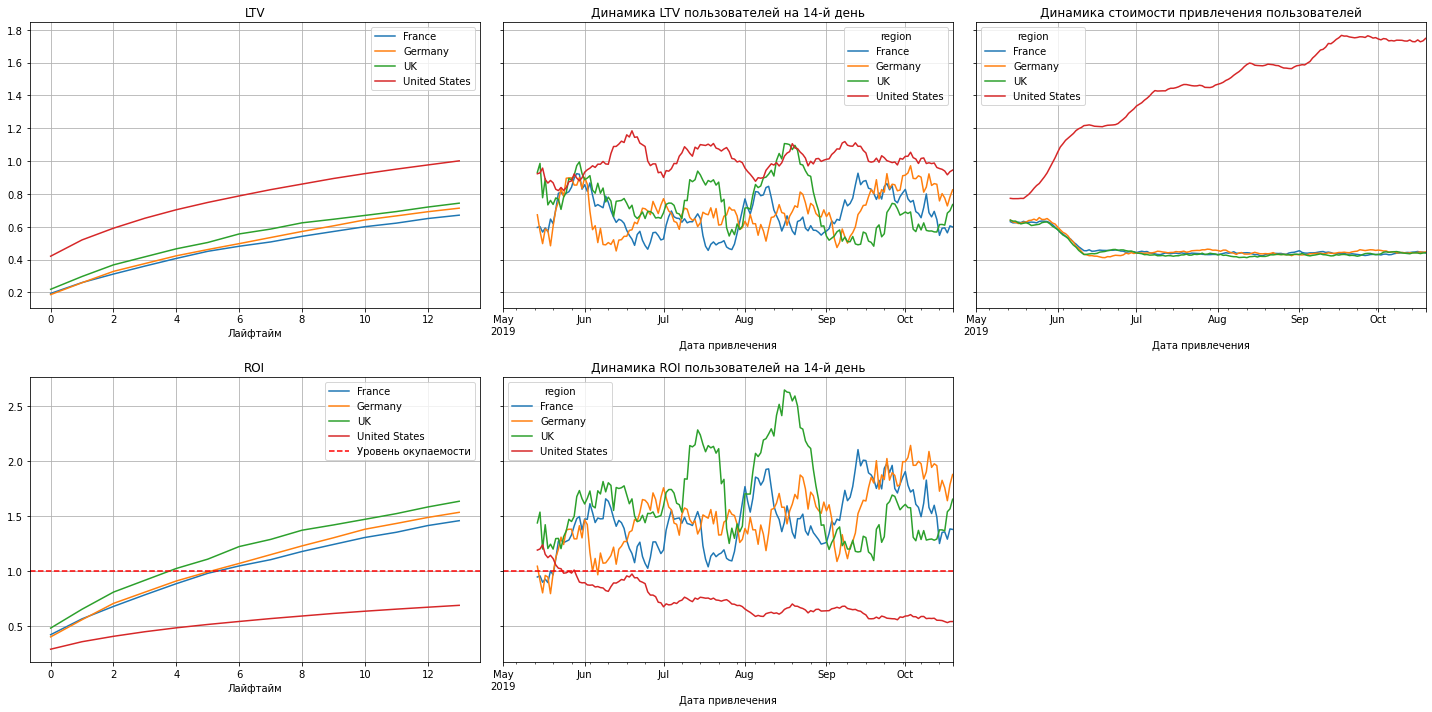

In [37]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- Динамика LTV колеблется, но остается стабильной.
- LTV пользователей из США выше, чем в других странах.
- Стоимость привлечения пользователей из США растет, а других стран снизилась в начале июня и осталась на этом уровне.
- Привлечение пользователей из Франции, Германии и Англии окупается в среднем через 4-5 дней. Особенно хорошо окупаются польтзователи из Англии. 
- Пользователи из США перестали окупаться с конца июня и динамика становилась всё хуже и хуже. Учитывая такую высокую стоимость привлечения, нужно направить своё внимание на этих пользователей.

Посмотрим на конверсию и её динамику с разбивкой по странам.

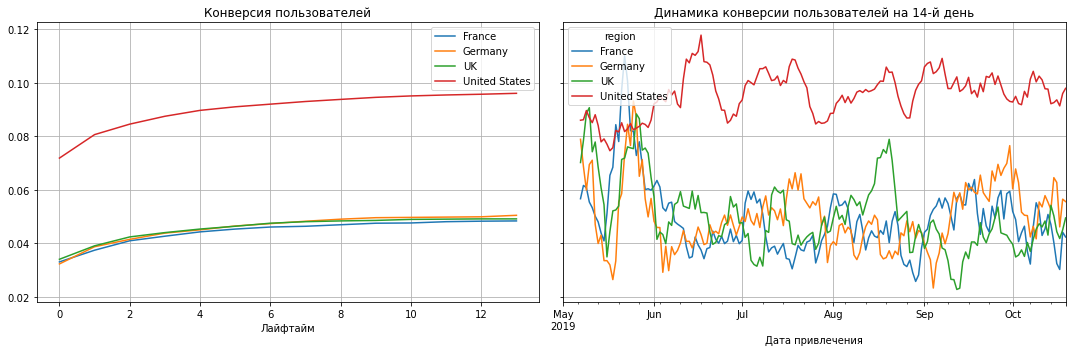

In [38]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей из США гораздо выше, чем у пользователей из других стран. Причем в конце июня был период, когда конверсия всех пользователей была на одном уровне, а потом у пользователей США она осталась на том же уровне, а в других странах опустилась.

Посмотрим на удержание и его динамику с разбивкой по странам.

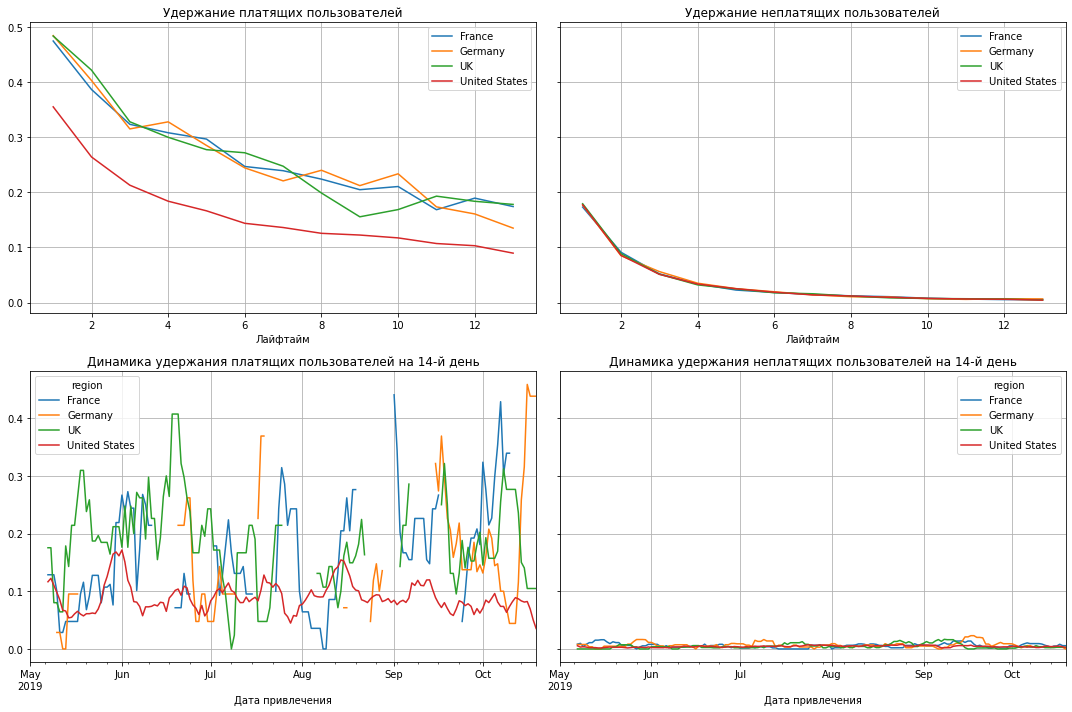

In [39]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание пользователей из США явно ниже, чем остальных пользователей. 

### Анализ окупаемость рекламы с разбивкой по рекламным каналам

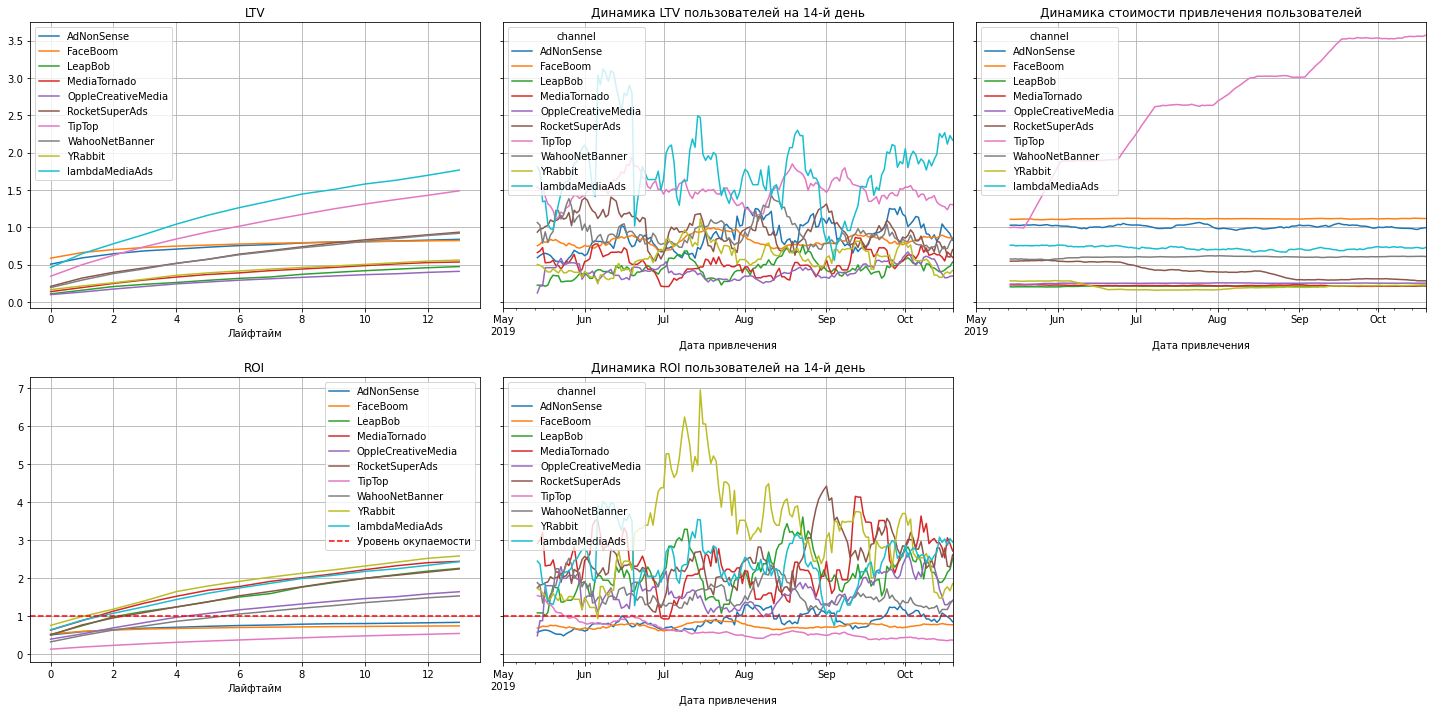

In [40]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- Лучше всего LTV растет у пользователей, приходящих из AdNonSense и TipTop
- Стоимость привлечения пользователей сильно растет у канала TipTop
- Не окупаются пользователи, пришедшие из каналов AdNonSense, FaceBoom, TipTop
- Лучше всего окупались пользователи, пришедшие из YRabbit. В июле ROI пользователей на 14-й день из этого канала был очень высок.

Посмотрим на конверсию и её динамику с разбивкой по каналам.

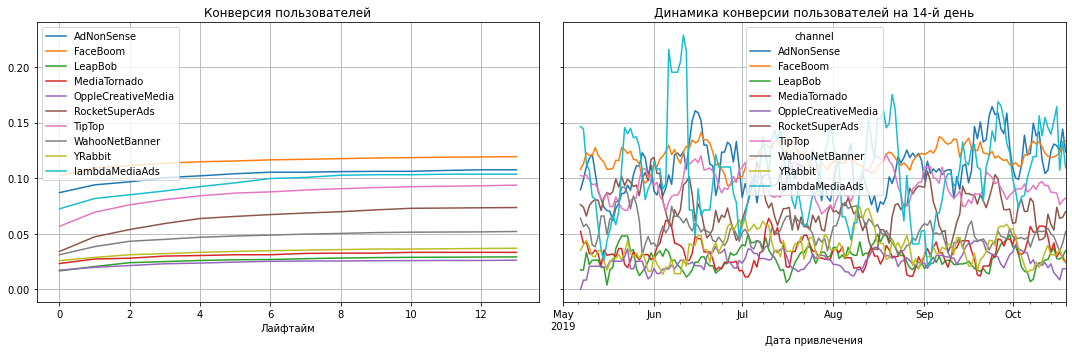

In [41]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Лучше всего конверсия из рекламных каналов AdNonSense и FaceBoom, хуже всего из LeapBoom и OppleCreativeMedia

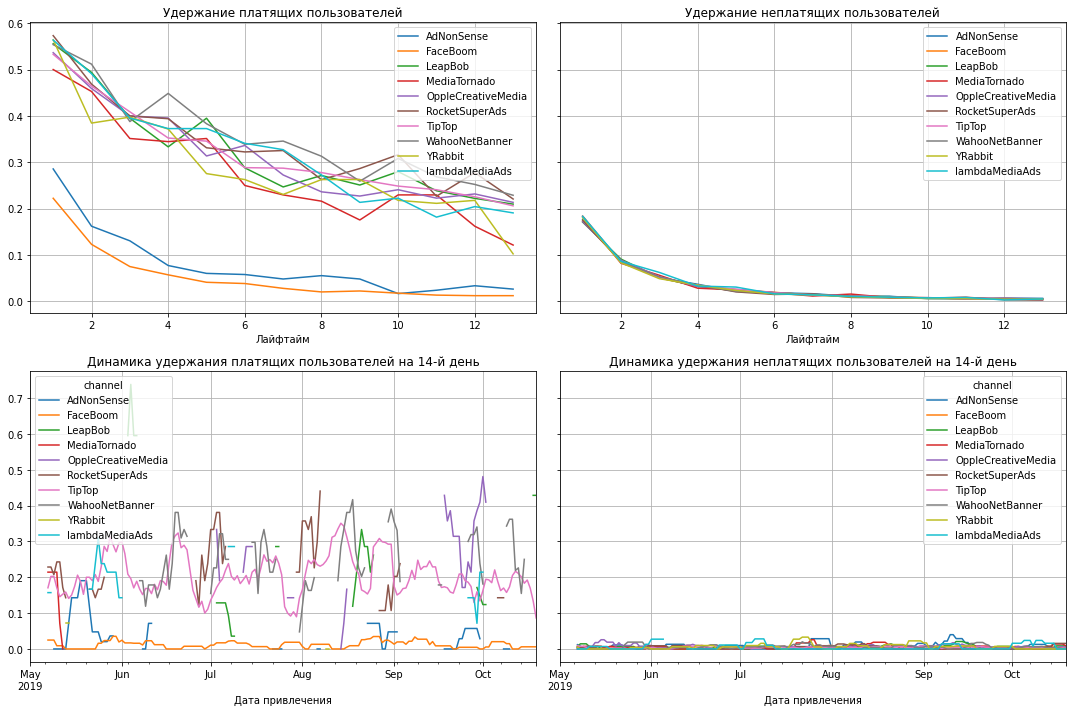

In [42]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи из AdNonSense и FaceBoom удерживаются гораздо хуже остальных.

Сгруппируем пользователей по странам и каналам привлечения, чтобы посмотреть из каких каналов приходят пользовали разных стран.

In [43]:
profiles.groupby(['region', 'channel']).agg({'user_id':'count'}).sort_values(by=['region','user_id'], ascending=False)

user_id
region        channel                    
United States FaceBoom              29144
              TipTop                19561
              RocketSuperAds         4448
              MediaTornado           4364
              YRabbit                4312
UK            OppleCreativeMedia     3052
              LeapBob                3046
              WahooNetBanner         3003
              AdNonSense             1295
              lambdaMediaAds          758
Germany       WahooNetBanner         2579
              OppleCreativeMedia     2562
              LeapBob                2519
              AdNonSense             1219
              lambdaMediaAds          649
France        OppleCreativeMedia     2991
              LeapBob                2988
              WahooNetBanner         2971
              AdNonSense             1366
              lambdaMediaAds          742

Из каналов FaceBoom и TipTop приходит больше всего пользователей и все эти пользователи из США. Можно предположить, что нет как таковой проблемы с пользователями США, так как например канал YRabbit (также доступный только в США) показал хорошую окупаемость. Скорее проблема в конкретных рекламных каналах, не окупивших вложений, на которые ушло много рекламного бюджета.

Сгруппируем пользователей по странам и устройствам, чтобы посмотреть какими устройствами пользуются в разных странах.

In [44]:
profiles.groupby(['region', 'device']).agg({'user_id':'count'}).sort_values(by=['region','user_id'], ascending=False)

user_id
region        device          
United States iPhone     27548
              Mac        15424
              Android    12436
              PC          6421
UK            PC          4551
              Android     3243
              iPhone      2274
              Mac         1086
Germany       PC          3797
              Android     2849
              iPhone      1862
              Mac         1020
France        PC          4384
              Android     3313
              iPhone      2198
              Mac         1163

По таблице можно сделать вывод, что большая часть владельцев iPhone и Mac из США. Поэтому вероятно проблемы конретно с этими устройствами тоже нет, проблема именно в каналах привлечения пользователей.

### Выводы

#### Причины неэффективности привлечения пользователей

Проведена общая оценка окупаемости рекламы. По графикам сделаны следующие выводы:
- Реклама не окупается. ROI в конце недели — чуть выше 80%.
- CAC не стабилен. Рекламный бюджет всё время увеличивается.
- На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
- ROI пользователей на 14-й день стабильно падает. До июля он был выше уровня окупаемости, а после стал опускаться все ниже. К ноябрю упал до 60%.

Для того, чтобы разобраться в причинах был проведен анализ LTV, CAC, ROI, а также проведена оценка конверсии и удержания по достпуным нам характеристикам - устройство, страна, рекламный канал. 
Были получены следующие выводы:

Анализ по устройствам.

- LTV стабильно растет.
- Стоимость привлечения пользователей постепенно увеличивается, особенно у пользолвателей IPhone и Mac.
- Реклама окупается только для пользователей PC. Для пользователей IPhone и Mac ROI не превышает 80%.

До июня реклама окупалась для всех устройств. В июне ROI пошел на спад, особенно для владельцев IPhone и Mac. У владельцев Android ситуация была чуть лучше, но границу окупаемости они тоже больше не пересекали.
Начиная с сентября ROI всех пользователей опустился ниже уровня окупаемости.

Конвертируются и удерживаются платящие пользователи примерно на одном уровне не зависимо от устройства.

Анализ по странам.

- Динамика LTV колеблется, но остается стабильной.
- LTV пользователей из США выше, чем в других странах.
- Стоимость привлечения пользователей из США растет, а других стран снизилась в начале июня и осталась на этом уровне.
- Привлечение пользователей из Франции, Германии и Англии окупается в среднем через 4-5 дней. Особенно хорошо окупаются польтзователи из Англии. 
- Пользователи из США перестали окупаться с конца июня и динамика становилась всё хуже и хуже. Учитывая такую высокую стоимость привлечения, нужно направить своё внимание на этих пользователей.

Конверсия пользователей из США гораздо выше, чем у пользователей из других стран. Причем в конце июня был период, когда конверсия всех пользователей была на одном уровне, а потом у пользователей США она осталась на том же уровне, а в других странах опустилась.
Удержание пользователей из США явно ниже, чем остальных пользователей.

Анализ по каналам.

- Лучше всего LTV растет у пользователей, приходящих из AdNonSense и TipTop
- Стоимость привлечения пользователей сильно растет у канала TipTop
- Не окупаются пользователи, пришедшие из каналов AdNonSense, FaceBoom, TipTop
- Лучше всего окупались пользователи, пришедшие из YRabbit. В июле ROI пользователей на 14-й день из этого канала был очень высок.

Лучше всего конверсия из рекламных каналов AdNonSense и FaceBoom, хуже всего из LeapBoom и OppleCreativeMedia.
Пользователи из AdNonSense и FaceBoom удерживаются гораздо хуже остальных.

Из каналов FaceBoom и TipTop приходит больше всего пользователей и все эти пользователи из США. Можно предположить, что нет как таковой проблемы с пользователями США, так как например канал YRabbit (также доступный только в США) показал хорошую окупаемость. Скорее проблема в конкретных рекламных каналах, не окупивших вложений, на которые ушло много рекламного бюджета.

Большая часть владельцев iPhone и Mac из США. Поэтому вероятно проблемы конретно с этими устройствами тоже нет, проблема именно в каналах привлечения пользователей.

**Основная причины неэффективности привлечения пользователей**
- Большие вложения в плохо окупающиеся рекламные каналы, в первую очередь TipTop и FaceBoom.
Эти каналы привлечения используются только в США Соответственно 80% всех вложений не окупается, и из-за этого пользователи США показывают отрицательную рентабельность. Тем самым, компания теряет огромную долю пользователей в этом регионе. 

#### Рекомендации для отдела маркетинга для повышения эффективности

- Необходимо перераспредлить вложения, которые уходят на рекламу в TipTop и FaceBoom. А также искать другие каналы продвижения в США, так как пользователи оттуда хорошо конвертируются, так что у них есть большой потенциал.
- Лучше всего окупаются пользователи из Англии, возможно стоит направить туда больший рекламный бюджет.
- В качестве альтернативных каналов, рекомендуется усилить рекламный бюджет в следующие каналы: `YRabbit`, `MediaTornado`, `lambdaMediaAds`. У данных каналов самая высокая окупаемость.